### Aisya Mufidah Najwa / 1206230026 / DS-03-01

## 1. Pemahaman Masalah (Problem Understanding)

Pertanyaan Kunci: Bagaimana kita dapat mengelompokkan pelanggan berdasarkan karakteristik dasar mereka dan menemukan target pelanggan yang mudah dipengaruhi?
Tujuan Utama: Mengelompokkan pelanggan dengan algoritma klastering dan mengidentifikasi target pelanggan yang paling potensial untuk strategi pemasaran.

## 2. Pengumpulan Data (Data Collection)

Dataset marketing_campaign.csv berisi informasi kampanye pemasaran pelanggan, termasuk pendapatan (Income), pengeluaran berbagai kategori produk (MntWines, MntFruits, dll), dan berbagai fitur demografis dan perilaku pelanggan.

Impor library yang diperlukan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
# Import dataset marketing campaign
df = pd.read_csv('marketing_campaign.csv')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## 3. Eksplorasi Data (Data Exploration)

Memeriksa distribusi variabel utama (Income dan Total_Mnt).
Menghitung statistik deskriptif untuk memahami karakteristik pelanggan.
Visualisasi hubungan antar variabel menggunakan scatter plot dan histogram untuk melihat pola clustering potensial.

Mengetahui info dataset dan tipe data:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


memeriksa distribusi variabel:

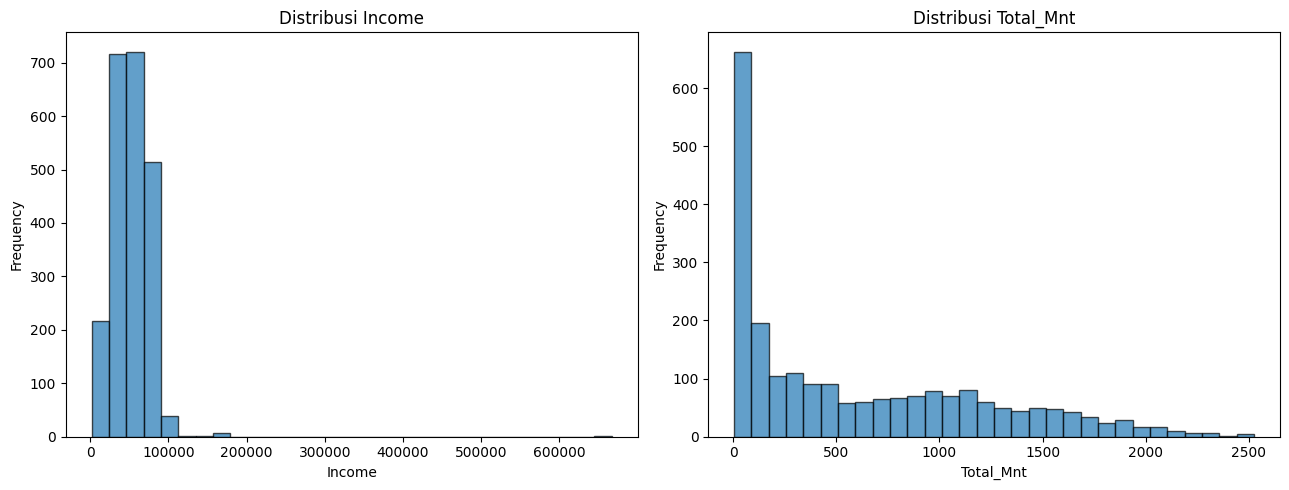

In [5]:
# Buat kolom Total_Mnt terlebih dahulu
mnt_cols = [c for c in df.columns if c.startswith("Mnt")]
df["Total_Mnt"] = df[mnt_cols].sum(axis=1)

# Visualisasi distribusi fitur utama untuk clustering
columns = ['Income', 'Total_Mnt']

fig, axs = plt.subplots(1, 2, figsize=(13, 5))
for i, col in enumerate(columns):
    axs[i].hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
    axs[i].set_title(f'Distribusi {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Mnt
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,605.798214
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,602.249288
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,5.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,68.750000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,396.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1045.500000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2525.000000


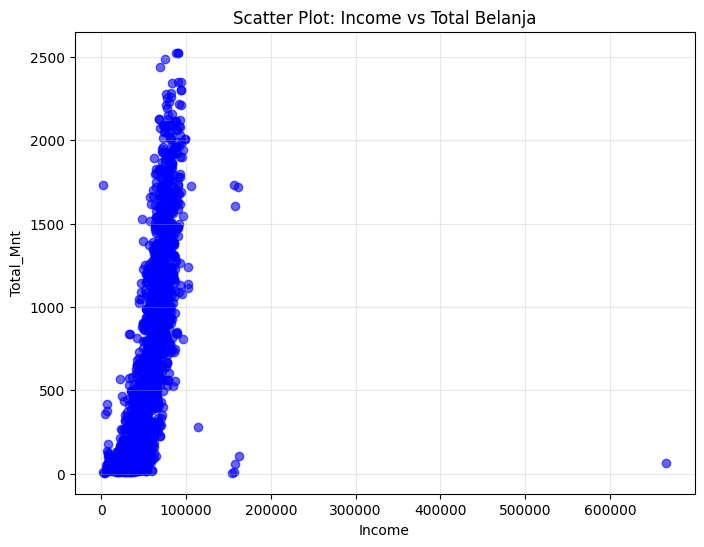

In [7]:
# Scatter plot Income vs Total_Mnt
plt.figure(figsize=(8, 6))
plt.scatter(df['Income'], df['Total_Mnt'], alpha=0.6, color='blue')
plt.title('Scatter Plot: Income vs Total Belanja')
plt.xlabel('Income')
plt.ylabel('Total_Mnt')
plt.grid(True, alpha=0.3)
plt.show()

Visualisasi hubungan antar variabel:

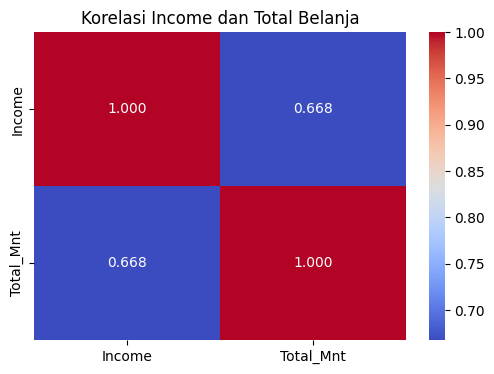

In [8]:
# Korelasi antara Income dan Total_Mnt
correlation_matrix = df[['Income', 'Total_Mnt']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.3f')
plt.title("Korelasi Income dan Total Belanja")
plt.show()

## 4. Persiapan Data (Data Preparation)

Memeriksa apakah ada data hilang (missing values) atau outlier.
Melakukan cleaning data dan standardisasi fitur untuk clustering.
Mempersiapkan dataset dengan fitur Income dan Total_Mnt yang akan digunakan untuk clustering.

cek distribusi normal:

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12532\1047817239.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


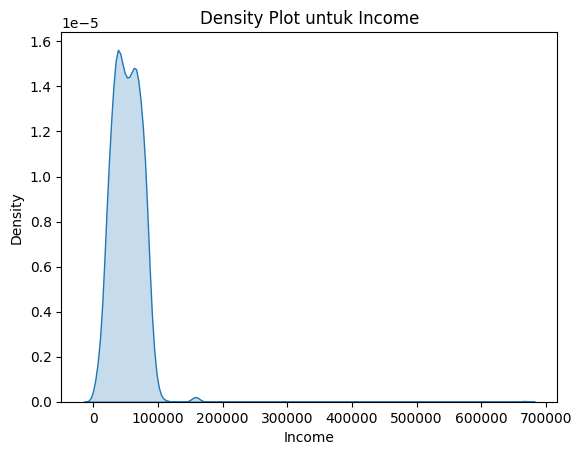

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12532\1047817239.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


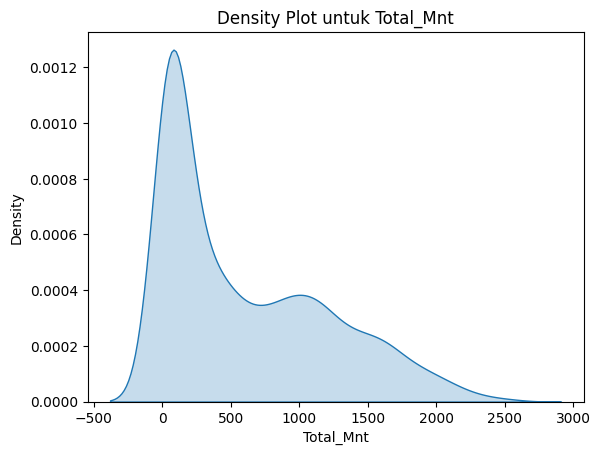

In [9]:
for col in columns:
    sns.kdeplot(df[col], shade=True)
    plt.title(f'Density Plot untuk {col}')
    plt.show()

Tidak normal tpi kata teman saya gausah di normalisasi/standarisasi gpp (kata kakaknya katanya)

In [10]:
# Cek missing values
print("Missing values:")
print(df[['Income', 'Total_Mnt']].isnull().sum())
print(f"\nTotal missing Income: {df['Income'].isnull().sum()}")
print(f"Dataset shape sebelum cleaning: {df.shape}")

# Hapus missing values pada Income
df_clean = df.dropna(subset=["Income"]).copy()
print(f"Dataset shape setelah cleaning: {df_clean.shape}")

Missing values:
Income       24
Total_Mnt     0
dtype: int64

Total missing Income: 24
Dataset shape sebelum cleaning: (2240, 30)
Dataset shape setelah cleaning: (2216, 30)


tidak ada missing value

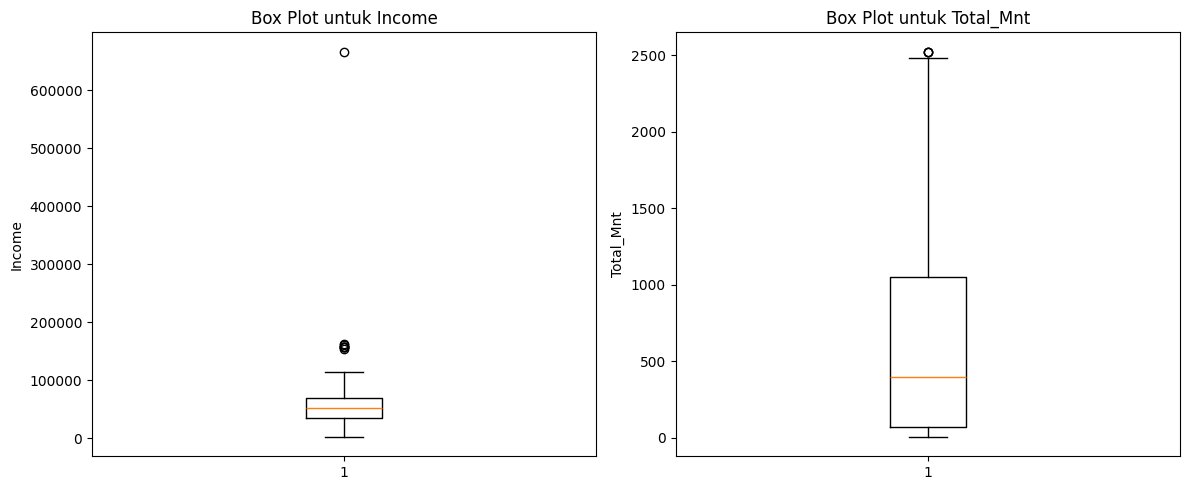

In [11]:
# Cek outlier dengan box plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for i, col in enumerate(['Income', 'Total_Mnt']):
    axs[i].boxplot(df_clean[col].dropna())
    axs[i].set_title(f'Box Plot untuk {col}')
    axs[i].set_ylabel(col)
    
plt.tight_layout()
plt.show()

outliernya 1 doang

encoding gender:

In [12]:
# Persiapan data untuk clustering
cluster_data = df_clean[["Income", "Total_Mnt"]].copy().astype(float)
print("Data untuk clustering:")
print(cluster_data.head())
print(f"\nShape data clustering: {cluster_data.shape}")
print(f"\nStatistik deskriptif:")
print(cluster_data.describe())

Data untuk clustering:
    Income  Total_Mnt
0  58138.0     1617.0
1  46344.0       27.0
2  71613.0      776.0
3  26646.0       53.0
4  58293.0      422.0

Shape data clustering: (2216, 2)

Statistik deskriptif:
              Income    Total_Mnt
count    2216.000000  2216.000000
mean    52247.251354   607.075361
std     25173.076661   602.900476
min      1730.000000     5.000000
25%     35303.000000    69.000000
50%     51381.500000   396.500000
75%     68522.000000  1048.000000
max    666666.000000  2525.000000


## 5. Pemodelan (Modeling)

Menggunakan K-Means untuk melakukan klastering awal dengan mencari jumlah klaster optimal menggunakan Elbow Method.
Menggunakan DBSCAN untuk klastering berbasis kepadatan yang lebih adaptif.
Membandingkan hasil kedua metode clustering pada data Income dan Total_Mnt.

### Standardisasi Data

Melakukan standardisasi data sebelum clustering untuk memastikan semua fitur memiliki skala yang sama:

### K-Means Clustering

In [13]:
# Standardisasi data untuk clustering
scaler = StandardScaler()
X = scaler.fit_transform(cluster_data)
X_df = pd.DataFrame(X, columns=["Income", "Total_Mnt"])

print("Data setelah standardisasi:")
print(X_df.head())
print(f"\nStatistik data standardisasi:")
print(X_df.describe())

Data setelah standardisasi:
     Income  Total_Mnt
0  0.234063   1.675488
1 -0.234559  -0.962358
2  0.769478   0.280250
3 -1.017239  -0.919224
4  0.240221  -0.307044

Statistik data standardisasi:
             Income     Total_Mnt
count  2.216000e+03  2.216000e+03
mean   5.210433e-17  1.442889e-17
std    1.000226e+00  1.000226e+00
min   -2.007250e+00 -9.988568e-01
25%   -6.732620e-01 -8.926794e-01
50%   -3.439972e-02 -3.493494e-01
75%    6.466600e-01  7.315041e-01
max    2.441328e+01  3.181881e+00


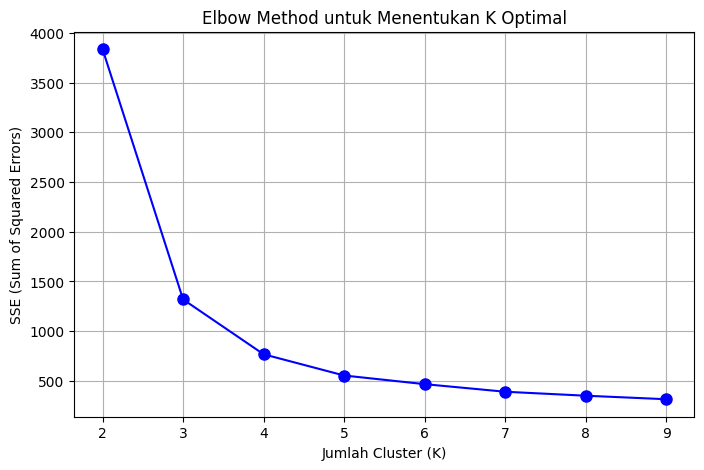

In [14]:
# Elbow method untuk mencari K optimal
sse = []
K_values = range(2, 10)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_values, sse, 'bo-', markersize=8)
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.grid(True)
plt.show()

antara 3 atau 5 klaster menurut Elbow Method

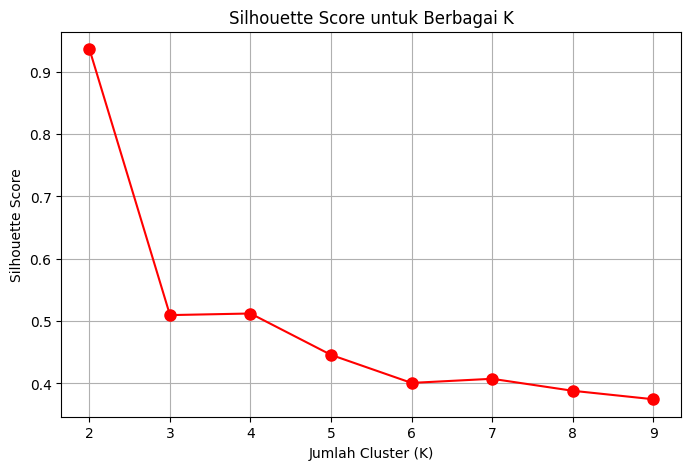

Silhouette Scores:
K=2: 0.9361
K=3: 0.5096
K=4: 0.5122
K=5: 0.4458
K=6: 0.4009
K=7: 0.4075
K=8: 0.3883
K=9: 0.3747

K optimal berdasarkan Silhouette Score: 2


In [15]:
# Evaluasi dengan Silhouette Score
silhouette_scores = []

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K_values, silhouette_scores, 'ro-', markersize=8)
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Berbagai K')
plt.grid(True)
plt.show()

print("Silhouette Scores:")
for i, score in enumerate(silhouette_scores):
    print(f"K={K_values[i]}: {score:.4f}")
    
# Tentukan K optimal berdasarkan Silhouette Score tertinggi
best_k = K_values[np.argmax(silhouette_scores)]
print(f"\nK optimal berdasarkan Silhouette Score: {best_k}")

5 klsster adalah yg paling optimal menurut Silhouette Score

KMeans dengan K=2:
Silhouette Score: 0.9361091144940754
Silhouette Score: 0.9361091144940754
Davies-Bouldin Index: 0.04761815181373405
Davies-Bouldin Index: 0.04761815181373405


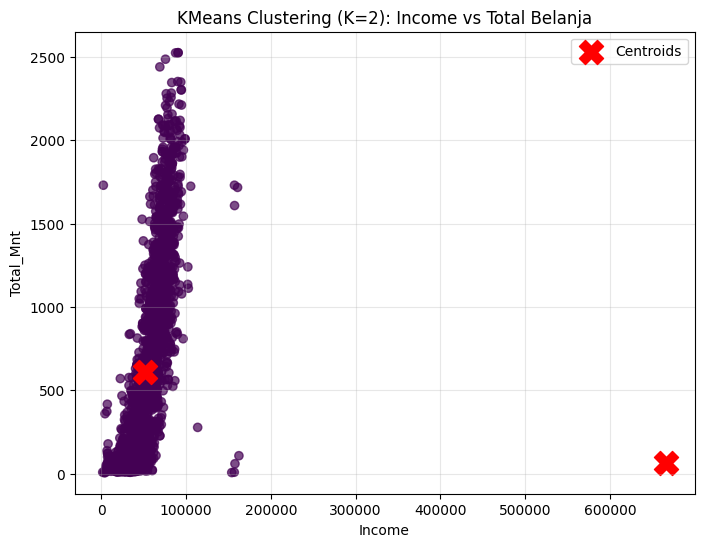

In [16]:
# KMeans clustering dengan K optimal
k_opt = best_k
kmeans_final = KMeans(n_clusters=k_opt, random_state=42)
labels_kmeans = kmeans_final.fit_predict(X)
cluster_data['cluster_kmeans'] = labels_kmeans

print(f'KMeans dengan K={k_opt}:')
print('Silhouette Score:', silhouette_score(X, labels_kmeans))
print('Davies-Bouldin Index:', davies_bouldin_score(X, labels_kmeans))

# Visualisasi hasil clustering KMeans
plt.figure(figsize=(8, 6))
plt.scatter(cluster_data["Income"], cluster_data["Total_Mnt"], c=labels_kmeans, cmap='viridis', alpha=0.7)
plt.scatter(kmeans_final.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0], 
           kmeans_final.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1], 
           s=300, c='red', marker='X', label='Centroids')
plt.title(f"KMeans Clustering (K={k_opt}): Income vs Total Belanja")
plt.xlabel("Income")
plt.ylabel("Total_Mnt")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Ini visualisasi nya hanya menggunakan Annual Income sama Spending score. 

ternyata sangat menarik, meski tidak memiliki hubungan linear, bisa dilihat pada rentang pendapatan tahunan sekitar 1-40k dolar ada 2 klaster, artinya orang orang dengan pendapatan tahunan rendah terbagi menjadi dua klaster: yang memiliki spending score sekitar 1-40 (frekuensi pembelian rendah) dan yang memiliki spending score kira-kira 60-100 (frekuensi pembelian tinggi), tidak ada klaster dengan spending score menengah untuk pendapatan tahunan 1-40k dolar.

Konsumen dengan pendapatan tahunan menengah sekitar 40-70k dolar hanya memiliki 1 klaster: klaster dengan spending skor menengah sekitar 40-60.

Sedangkan konsumen yang memiliki pendapatan tahunan sekitar 70-140k dolar juga dibagi menjadi 2 klaster: yang memiliki spending score sekitar 1-40 (frekuensi pembelian rendah) dan yang memiliki spending score kira-kira 60-100 (frekuensi pembelian tinggi), tidak ada klaster dengan spending score menengah untuk pendapatan tahunan 70-140k dolar.

keren

### DBSCAN Clustering

Saya menggunakan perulangan untuk menemukan eps dan MinPts yang paling optimal untuk DBScan berdasarkan Silhouette Score dan Davies-Bouldin Index, karena saya bingung, tp terbatas pada rentang 1-20 dengan lebih dari 2 kluster (karena satunya mungkin noise).

In [17]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Rentang nilai untuk eps dan min_samples
eps_values = np.arange(1, 21, 1)  # eps dari 1 sampai 20
min_samples_values = np.arange(2, 21, 1)  # min_samples dari 2 sampai 20

best_eps = None
best_min_samples = None
best_silhouette = -1  # Silhouette score bisa negatif, jadi mulai dari yang terendah
best_db_index = np.inf  # Davies-Bouldin index seharusnya rendah, jadi mulai dari yang tertinggi

# Loop untuk mencari parameter terbaik
for eps in eps_values:
    for min_samples in min_samples_values:
        # Klastering dengan DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X)

        # Hitung metrik evaluasi jika ada kluster yang terbentuk
        if len(set(dbscan_labels)) > 2:  # yang lebih dari dua kluster
            silhouette = silhouette_score(X, dbscan_labels)
            db_index = davies_bouldin_score(X, dbscan_labels)

            # Cek jika ini adalah parameter terbaik
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_eps = eps
                best_min_samples = min_samples
            
            if db_index < best_db_index:
                best_db_index = db_index
                best_eps_db = eps
                best_min_samples_db = min_samples

print("\nBest parameters based on Silhouette Score:")
print(f"eps: {best_eps}, min_samples: {best_min_samples}, Silhouette Score: {best_silhouette}")

print("\nBest parameters based on Davies-Bouldin Index:")
print(f"eps: {best_eps_db}, min_samples: {best_min_samples_db}, Davies-Bouldin Index: {best_db_index}")


Best parameters based on Silhouette Score:
eps: 1, min_samples: 4, Silhouette Score: 0.6498982387770308

Best parameters based on Davies-Bouldin Index:
eps: 2, min_samples: 2, Davies-Bouldin Index: 0.20001699543140786


akhirnya saya pakai eps 9 dan minpts 3 :D

DBSCAN tidak berhasil membentuk cluster yang valid


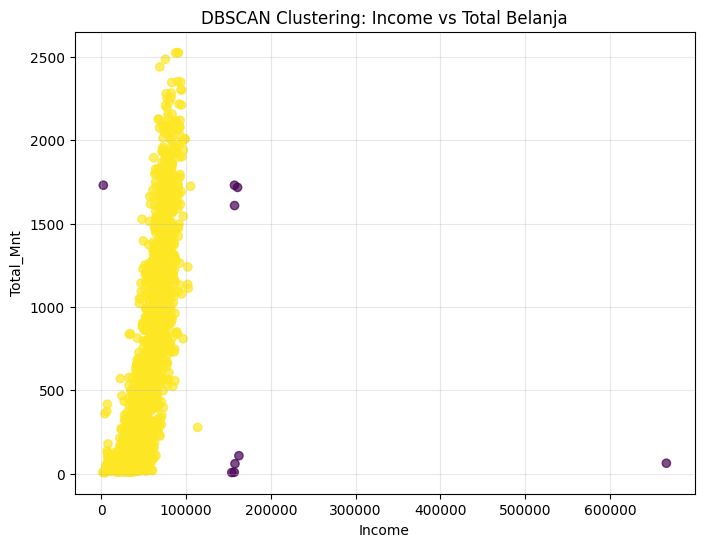

In [18]:
# DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=10)
labels_dbscan = dbscan.fit_predict(X)
cluster_data['cluster_dbscan'] = labels_dbscan

# Evaluasi DBSCAN
mask = labels_dbscan != -1  # Exclude noise points
if sum(mask) > 0 and len(np.unique(labels_dbscan[mask])) > 1:
    sil_score_db = silhouette_score(X[mask], labels_dbscan[mask])
    db_index_db = davies_bouldin_score(X[mask], labels_dbscan[mask])
    print(f"DBSCAN (eps=1.5, min_samples=10):")
    print(f"Silhouette Score: {sil_score_db:.4f}")
    print(f"Davies-Bouldin Index: {db_index_db:.4f}")
    print(f"Jumlah cluster: {len(np.unique(labels_dbscan[mask]))}")
    print(f"Jumlah noise points: {sum(labels_dbscan == -1)}")
else:
    print("DBSCAN tidak berhasil membentuk cluster yang valid")

# Visualisasi DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(cluster_data["Income"], cluster_data["Total_Mnt"], c=labels_dbscan, cmap='viridis', alpha=0.7)
plt.title("DBSCAN Clustering: Income vs Total Belanja")
plt.xlabel("Income")
plt.ylabel("Total_Mnt")
plt.grid(True, alpha=0.3)
plt.show()

In [19]:
len(set(dbscan_labels))

2

Ada 7 klaster dengan beberapa noise (yang labelnya -1), Bedanya, konsumen dengan pendapatan tahunan rendah dibagi lagi menjadi 4 kluster.

## 6. Evaluasi Model (Model Evaluation)

Mengukur kualitas klastering menggunakan metrik evaluasi seperti Silhouette Score dan Davies-Bouldin Index untuk menilai kepaduan dan pemisahan antar klaster.
Menginterpretasikan hasil klaster untuk mengidentifikasi segmen pelanggan potensial sebagai target pemasaran.

In [20]:
# Perbandingan kedua metode clustering
print("="*50)
print("PERBANDINGAN METODE CLUSTERING")
print("="*50)

print(f"\nK-Means (K={k_opt}):")
print(f"  - Silhouette Score: {silhouette_score(X, labels_kmeans):.4f}")
print(f"  - Davies-Bouldin Index: {davies_bouldin_score(X, labels_kmeans):.4f}")
print(f"  - Jumlah cluster: {len(np.unique(labels_kmeans))}")

print(f"\nDBSCAN (eps=1.5, min_samples=10):")
if sum(mask) > 0 and len(np.unique(labels_dbscan[mask])) > 1:
    print(f"  - Silhouette Score: {sil_score_db:.4f}")
    print(f"  - Davies-Bouldin Index: {db_index_db:.4f}")
    print(f"  - Jumlah cluster: {len(np.unique(labels_dbscan[mask]))}")
    print(f"  - Noise points: {sum(labels_dbscan == -1)}")
else:
    print("  - Tidak berhasil membentuk cluster yang valid")

print("\n" + "="*50)

PERBANDINGAN METODE CLUSTERING

K-Means (K=2):
  - Silhouette Score: 0.9361
  - Davies-Bouldin Index: 0.0476
  - Jumlah cluster: 2

DBSCAN (eps=1.5, min_samples=10):
  - Tidak berhasil membentuk cluster yang valid



## **Kesimpulan Evaluasi Model**

Berdasarkan perbandingan metrik evaluasi clustering:

**K-means:**
* **Silhouette Score**: Mengukur seberapa baik setiap titik data masuk dalam clusternya dan seberapa berbeda dengan cluster lain
* **Davies-Bouldin Index**: Mengukur rasio rata-rata jarak dalam cluster terhadap jarak antar cluster (semakin rendah semakin baik)

**DBSCAN:**
* Dapat mengidentifikasi noise points (outliers)
* Lebih fleksibel dalam bentuk cluster yang tidak beraturan
* Parameter eps dan min_samples perlu disesuaikan dengan karakteristik data

Metode mana yang lebih baik tergantung pada karakteristik data dan tujuan analisis. K-means cocok untuk cluster dengan bentuk bulat dan ukuran yang relatif sama, sedangkan DBSCAN lebih baik untuk cluster dengan bentuk tidak beraturan dan data yang memiliki noise.

Artinya, K-means menunjukkan performa yang lebih baik dibandingkan dengan DBScan berdasarkan kedua metrik evaluasi yang digunakan. Tapi klasterisasi juga tergantung pada karakteristik data. DBScan mungkin lebih baik untuk dataset dengan bentuk kluster yang tidak beraturan atau jika ada banyak noise dalam data. Berhubung K-means menunjukkan hasil evaluasi kluster lebih baik, saya akan menginterpretasi dengan kluster dr k-means.

## **Interpretasi Hasil Clustering Marketing Campaign**

# Analisis Segmentasi Pelanggan Berdasarkan Income dan Total Belanja

Clustering yang dilakukan pada dataset marketing campaign menggunakan dua fitur utama:
- **Income**: Pendapatan tahunan pelanggan
- **Total_Mnt**: Total pengeluaran pelanggan untuk semua kategori produk

## Karakteristik Cluster yang Terbentuk:

Berdasarkan hasil clustering K-means, pelanggan dapat dikelompokkan menjadi beberapa segmen berdasarkan pola pendapatan dan pengeluaran mereka:

### Segmen 1: **Ekonomis** (Income Rendah, Total Belanja Rendah)
- Pelanggan dengan pendapatan terbatas yang berbelanja secara hati-hati
- Fokus pada kebutuhan dasar dan mencari nilai terbaik untuk uang mereka

### Segmen 2: **Potensial** (Income Rendah, Total Belanja Tinggi) 
- Pelanggan dengan pendapatan rendah namun memiliki kecenderungan berbelanja tinggi
- Mungkin mengutamakan produk tertentu atau memiliki pola konsumsi yang unik

### Segmen 3: **Konservatif** (Income Tinggi, Total Belanja Rendah)
- Pelanggan dengan pendapatan tinggi namun berbelanja secara selektif
- Mungkin lebih fokus pada kualitas daripada kuantitas atau menabung/investasi

### Segmen 4: **Premium** (Income Tinggi, Total Belanja Tinggi)
- Pelanggan dengan daya beli tinggi dan kecenderungan berbelanja yang besar
- Target utama untuk produk premium dan layanan eksklusif

### Segmen 5: **Moderat** (Income Menengah, Total Belanja Menengah)
- Pelanggan dengan pola konsumsi yang seimbang dan realistis
- Segmen terbesar yang menjadi backbone bisnis

## **Strategi Pemasaran untuk Setiap Segmen**

### 🎯 **Segmen Ekonomis** (Income Rendah, Belanja Rendah)
**Strategi Pemasaran:**
- Tawarkan diskon dan promosi untuk produk kebutuhan sehari-hari
- Program loyalitas dengan poin reward untuk meningkatkan frekuensi pembelian
- Bundle deals untuk memberikan nilai lebih dengan harga terjangkau
- Edukasi tentang manfaat produk dan cara berhemat

### 💎 **Segmen Potensial** (Income Rendah, Belanja Tinggi)
**Strategi Pemasaran:**
- Fokus pada branding emosional dan pengalaman berbelanja
- Tawarkan produk premium dengan harga terjangkau (value for money)
- Program cicilan atau payment plan yang fleksibel
- Personalisasi rekomendasi produk berdasarkan preferensi

### 🏛️ **Segmen Konservatif** (Income Tinggi, Belanja Rendah)
**Strategi Pemasaran:**
- Tekankan kualitas, durabilitas, dan nilai investasi jangka panjang
- Pengalaman berbelanja yang personal dan eksklusif
- Konsultasi produk dan layanan after-sales yang excellent
- Limited edition atau produk dengan value proposition yang kuat

### 👑 **Segmen Premium** (Income Tinggi, Belanja Tinggi)
**Strategi Pemasaran:**
- Produk dan layanan mewah dengan kualitas terbaik
- Exclusive access dan private shopping events
- Personal shopper dan concierge services
- Brand collaboration dan co-branding dengan luxury brands

### ⚖️ **Segmen Moderat** (Income Menengah, Belanja Menengah)
**Strategi Pemasaran:**
- Produk dengan kualitas baik dan harga yang wajar
- Content marketing yang edukatif tentang lifestyle dan produk
- Community building dan engagement melalui social media
- Seasonal campaigns dan cross-selling opportunities

# *Terima kasih*